<a href="https://colab.research.google.com/github/SS-Prospectus/SUTT-AI-ML-Task/blob/main/Sutt_AI_ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Training Data - Recruitments 2024 - GPL Prediction - Training Data.csv'

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,19.0,BITSAT,8.85,7.0,NaN,CBSE,12,4/22/2005,4,YES,NO,LITE,20495,5.00,NO
1,female,21.0,DASA,7.01,9.0,NaN,ICSE,1,8/8/2003,1,YES,NO,GHOT,2361,0.20,YES
2,female,20.0,BITSAT,3.00,8.0,NaN,CBSE,5,5/5/2004,4,YES,NO,GHOT,8548,0.30,YES
3,female,NaN,DASA,NaN,NaN,NaN,CBSE,7,10/6/2003,4,YES,NO,GHOT,4086,0.20,YES
4,male,21.0,BITSAT,5.65,9.0,NaN,CBSE,7,3/15/2003,3,YES,NO,LITE,13767,8.50,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,male,19.0,BOARD TOPPER,6.02,3.0,NaN,CBSE,6,7/16/2005,0,NO,NO,GHOT,13166,3.90,NO
1095,female,24.0,BOARD TOPPER,3.57,6.0,NaN,CBSE,5,2/3/2000,2,NO,NO,GHOT,5619,0.30,YES
1096,female,21.0,BITSAT,3.71,5.0,Gaming Club,CBSE,0,4/12/2003,4,NO,YES,LITE,17559,5.40,NO
1097,male,22.0,DASA,9.68,5.0,NaN,CBSE,3,4/25/2002,3,NO,NO,GHOT,16411,8.70,NO


# **Data Cleaning**

## Handling missing values

In [ ]:
#renaming the column names
df = df.rename(columns={
    'SEX':'sex',
    ' AGES': 'age',
    'ADMISSION MODE':'admission_mode',
    'CGPA - 1':'cgpa1',
    'CGPA-2':'cgpa2',
    ' CLUB / DEPARTMENT':'club_dept',
    'BOARD STUDIED':'board',
    'DAYS SINCE LAST SHOWER':'days since shower',
    'BIRTHDAY': 'dob',
    'TREATS GIVEN':'treats_given',
    ' HAS A S/O ?':'has_s/o',
    'ATTENDS LECTURES':'attends_lecs',
    'CHARACTER':'character',
    'PIZZERIA EXPENDITURE (annual)':'annual_pizz_expenditure',
    'GRAMS / MONTH':'grams/month',
    'GPL':'gpl'
})

In [ ]:
missing_vals = df.isnull().sum()

In [ ]:
print(missing_vals)

sex                           0
age                          23
admission_mode                0
cgpa1                        10
cgpa2                         8
club_dept                  1014
board                         0
days since shower             0
dob                           0
treats_given                  0
has_s/o                       0
attends_lecs                  0
character                     0
annual_pizz_expenditure       0
grams/month                   0
gpl                           0
dtype: int64


In [ ]:
# assigning missing vaues the average value
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
# assigning missing vaues the average value
df['cgpa1'] = df['cgpa1'].fillna(df['cgpa1'].mean())

In [ ]:
# a new value none for null vals
df['club_dept'] = df['club_dept'].fillna('none')

In [ ]:
# assigning missing vaues the average value
df['cgpa2'] = df['cgpa2'].fillna(df['cgpa2'].mean())

In [ ]:
missing_vals = df.isnull().sum()
print(missing_vals)

sex                        0
age                        0
admission_mode             0
cgpa1                      0
cgpa2                      0
club_dept                  0
board                      0
days since shower          0
dob                        0
treats_given               0
has_s/o                    0
attends_lecs               0
character                  0
annual_pizz_expenditure    0
grams/month                0
gpl                        0
dtype: int64


## Handling Categorical data

In [ ]:
df_cat = df.select_dtypes(object)
df_cat.head()

,sex,admission_mode,club_dept,board,dob,has_s/o,attends_lecs,character,gpl
0,male,BITSAT,none,CBSE,4/22/2005,YES,NO,LITE,NO
1,female,DASA,none,ICSE,8/8/2003,YES,NO,GHOT,YES
2,female,BITSAT,none,CBSE,5/5/2004,YES,NO,GHOT,YES
3,female,DASA,none,CBSE,10/6/2003,YES,NO,GHOT,YES
4,male,BITSAT,none,CBSE,3/15/2003,YES,NO,LITE,NO


In [ ]:
#removing dob for now, will use it better
df_cat = df_cat.drop('dob',axis = 1)

In [ ]:
df_num = df.select_dtypes(['int64','float64'])
df_num.head()

,age,cgpa1,cgpa2,days since shower,treats_given,annual_pizz_expenditure,grams/month
0,19.000000,8.85000,7.000000,12,4,20495,5.0
1,21.000000,7.01000,9.000000,1,1,2361,0.2
2,20.000000,3.00000,8.000000,5,4,8548,0.3
3,19.688662,6.46573,6.591201,7,4,4086,0.2
4,21.000000,5.65000,9.000000,7,3,13767,8.5


In [ ]:
df_cat['sex'].value_counts()

male      707
female    392
Name: sex, dtype: int64

In [ ]:
df_cat['admission_mode'].value_counts()

BITSAT          599
DASA            273
BOARD TOPPER    227
Name: admission_mode, dtype: int64

In [ ]:
df_cat['club_dept'].value_counts()

none              1014
DVM                 34
Gaming Club         18
Mountaineering      13
SUTT                 7
Mountainring         1
Mou                  1
VM                   1
moneering            1
dv                   1
Gaming               1
Mtaineering          1
SUTt                 1
Gaing Clu            1
DVm                  1
Mountaneering        1
SuTT                 1
Gamub                1
Name: club_dept, dtype: int64

In [ ]:
df_cat['board'].value_counts()

CBSE       772
ICSE       221
Other      104
Invalid      2
Name: board, dtype: int64

In [ ]:
df_cat['has_s/o'].value_counts()

NO       576
YES      493
FALSE     30
Name: has_s/o, dtype: int64

In [ ]:
df_cat['attends_lecs'].value_counts()

NO     848
YES    251
Name: attends_lecs, dtype: int64

In [ ]:
df_cat['character'].value_counts()

LITE    615
GHOT    484
Name: character, dtype: int64

In [ ]:
df_cat['gpl'].value_counts()

NO     668
YES    431
Name: gpl, dtype: int64

In [ ]:
# clearly the columns of gpl, dob, character, attends_lecs, addmission_mode and sex are proper but the column has_s/o has 30 incorrect values, board has 2 outliers and the column of club_dept is litterally messed up very badly :(

In [ ]:
# fixing the club_dept column
df_cat['club_dept'] = df_cat['club_dept'].replace({
    'Gaing Clu': 'Gaming Club',
    'Gaming': 'Gaming Club',
    'Gamub': 'Gaming Club',
    'Mountainring': 'Mountaineering',
    'Mou': 'Mountaineering',
    'moneering': 'Mountaineering',
    'Mtaineering' : 'Mountaineering',
    'Mountaneering': 'Mountaineering',
    'SUTt': 'SUTT',
    'SuTT': 'SUTT',
    'dv': 'DVM',
    'VM': 'DVM',
    'DVm': 'DVM',
})
df_cat['club_dept'].value_counts()

none              1014
DVM                 37
Gaming Club         21
Mountaineering      18
SUTT                 9
Name: club_dept, dtype: int64

In [ ]:
# fixing the board column
df_cat['board'] = df_cat['board'].replace({
    'Invalid': 'Other'
})
df_cat['board'].value_counts()

CBSE     772
ICSE     221
Other    106
Name: board, dtype: int64

In [ ]:
# fixing the has_s/o column
df_cat['has_s/o'] = df_cat['has_s/o'].replace({
    'FALSE': 'NO'
})
df_cat['has_s/o'].value_counts()

NO     606
YES    493
Name: has_s/o, dtype: int64

In [ ]:
# encoding all categorical data using sikitlearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in df_cat:
  df[col] = le.fit_transform(df_cat[col])

df.head()

,sex,age,admission_mode,cgpa1,cgpa2,club_dept,board,days since shower,dob,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month,gpl
0,1,19.000000,0,8.85000,7.000000,4,0,12,4/22/2005,4,1,0,1,20495,5.0,0
1,0,21.000000,2,7.01000,9.000000,4,1,1,8/8/2003,1,1,0,0,2361,0.2,1
2,0,20.000000,0,3.00000,8.000000,4,0,5,5/5/2004,4,1,0,0,8548,0.3,1
3,0,19.688662,2,6.46573,6.591201,4,0,7,10/6/2003,4,1,0,0,4086,0.2,1
4,1,21.000000,0,5.65000,9.000000,4,0,7,3/15/2003,3,1,0,1,13767,8.5,0


In [ ]:
# from the dob column only the weekday they correspond and the month they fall in are significant imo
df['dob'] = pd.to_datetime(df['dob'])

# Extract month and day of week
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.dayofweek

# Dropping the original 'DOB' column since no longer need it
df = df.drop('dob', axis=1)

df.head()

,sex,age,admission_mode,cgpa1,cgpa2,club_dept,board,days since shower,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month,gpl,dob_month,dob_day
0,1,19.000000,0,8.85000,7.000000,4,0,12,4,1,0,1,20495,5.0,0,4,4
1,0,21.000000,2,7.01000,9.000000,4,1,1,1,1,0,0,2361,0.2,1,8,4
2,0,20.000000,0,3.00000,8.000000,4,0,5,4,1,0,0,8548,0.3,1,5,2
3,0,19.688662,2,6.46573,6.591201,4,0,7,4,1,0,0,4086,0.2,1,10,0
4,1,21.000000,0,5.65000,9.000000,4,0,7,3,1,0,1,13767,8.5,0,3,5


In [ ]:
#combining cgpa1 and cgpa2 to one column cgpa
df['cgpa'] = (df['cgpa1'] + df['cgpa2']) / 2
df = df.drop(['cgpa1', 'cgpa2'], axis=1)

In [ ]:
df.head()

,sex,age,admission_mode,club_dept,board,days since shower,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month,gpl,dob_month,dob_day,cgpa
0,1,19.000000,0,4,0,12,4,1,0,1,20495,5.0,0,4,4,7.925000
1,0,21.000000,2,4,1,1,1,1,0,0,2361,0.2,1,8,4,8.005000
2,0,20.000000,0,4,0,5,4,1,0,0,8548,0.3,1,5,2,5.500000
3,0,19.688662,2,4,0,7,4,1,0,0,4086,0.2,1,10,0,6.528465
4,1,21.000000,0,4,0,7,3,1,0,1,13767,8.5,0,3,5,7.325000


In [ ]:
#the age column has a problem it has a value 19.688 also the age values are in float, will convert them to int
df['age'] = df['age'].astype(int)
df['age'].value_counts()

17    254
20    246
19    212
21    146
22    106
23     52
18     40
24     35
25      6
26      2
Name: age, dtype: int64

## Handling Outliers

<ipython-input-402-d9ae5470a406>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{'age','days since shower'}].boxplot()


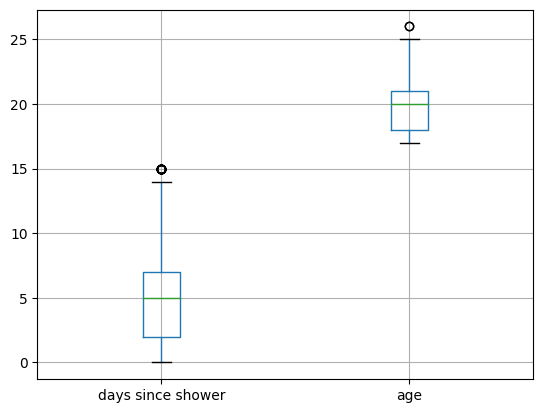

In [ ]:
#numeric values like age, days since shower, annual pizz expenditure can have some outliers
#seeing boxplot to find outliers
import matplotlib.pyplot as plt

df[{'age','days since shower'}].boxplot()
plt.show()

<ipython-input-403-787af4ef6c2c>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{'treats_given','grams/month'}].boxplot()


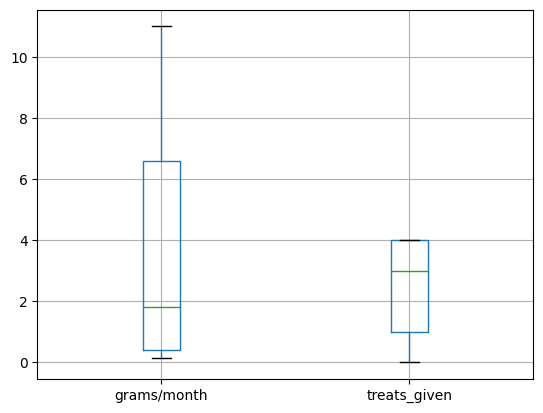

In [ ]:
df[{'treats_given','grams/month'}].boxplot()
plt.show()

<ipython-input-404-5b0d473eca67>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[{'annual_pizz_expenditure'}].boxplot()


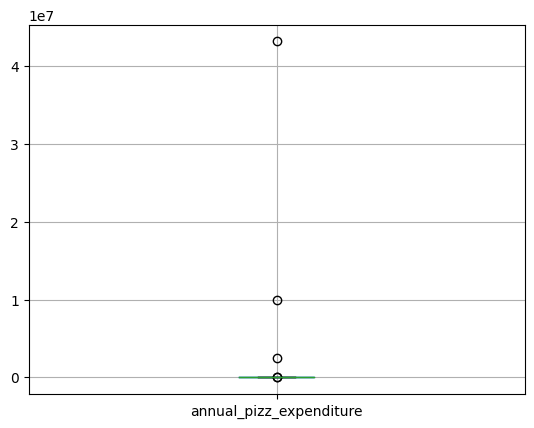

In [ ]:
df[{'annual_pizz_expenditure'}].boxplot()
plt.show()

<ipython-input-405-63365d1a5a02>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


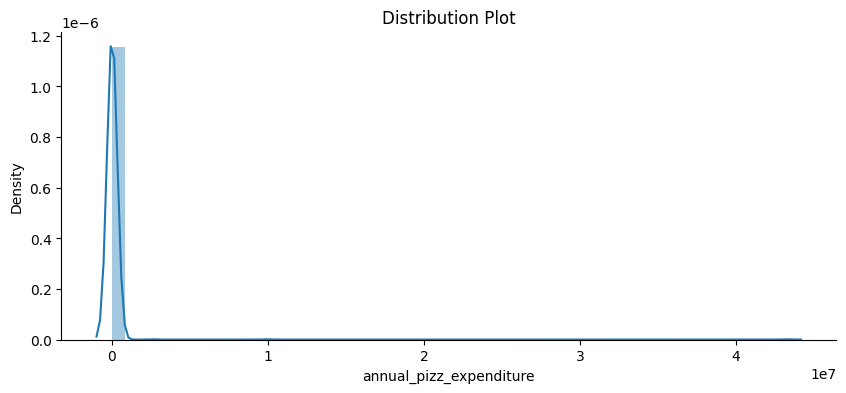

In [ ]:
#clearly the columns 'treat given' and 'grams/month' don't have any outliers, 'days since shower' and 'age' are also fine but 'annual _pizz_expenditure' sure has some high deviationn outliers

import seaborn as sns

def dist_plots(d):
  plt.figure(figsize = (10,4))
  sns.distplot(d)
  plt.title("Distribution Plot")
  sns.despine()
  plt.show()

dist_plots(df['annual_pizz_expenditure'])

In [ ]:
# lower bounds are fine but there are some upper bound outliers, we'll see top 10 values to find the outliers
top_values = df['annual_pizz_expenditure'].nlargest(10)

print(top_values)

564    43170987
262    10000000
522     2523450
384      100000
441       75000
12        21981
217       21901
46        21835
242       21815
304       21727
Name: annual_pizz_expenditure, dtype: int64


In [ ]:
#values upto 25k are pretty realistic, i'll assign the rest some upper bound value
# Set values greater than 25000 to 40000
df.loc[df['annual_pizz_expenditure'] > 25000, 'annual_pizz_expenditure'] = 40000

In [ ]:
# not setting any lower bounds, these values are realistic
top_values = df['annual_pizz_expenditure'].nlargest(10)
print(top_values)

262    40000
384    40000
441    40000
522    40000
564    40000
12     21981
217    21901
46     21835
242    21815
304    21727
Name: annual_pizz_expenditure, dtype: int64


In [ ]:
df.head()

,sex,age,admission_mode,club_dept,board,days since shower,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month,gpl,dob_month,dob_day,cgpa
0,1,19,0,4,0,12,4,1,0,1,20495,5.0,0,4,4,7.925000
1,0,21,2,4,1,1,1,1,0,0,2361,0.2,1,8,4,8.005000
2,0,20,0,4,0,5,4,1,0,0,8548,0.3,1,5,2,5.500000
3,0,19,2,4,0,7,4,1,0,0,4086,0.2,1,10,0,6.528465
4,1,21,0,4,0,7,3,1,0,1,13767,8.5,0,3,5,7.325000


# **Data Analysis**

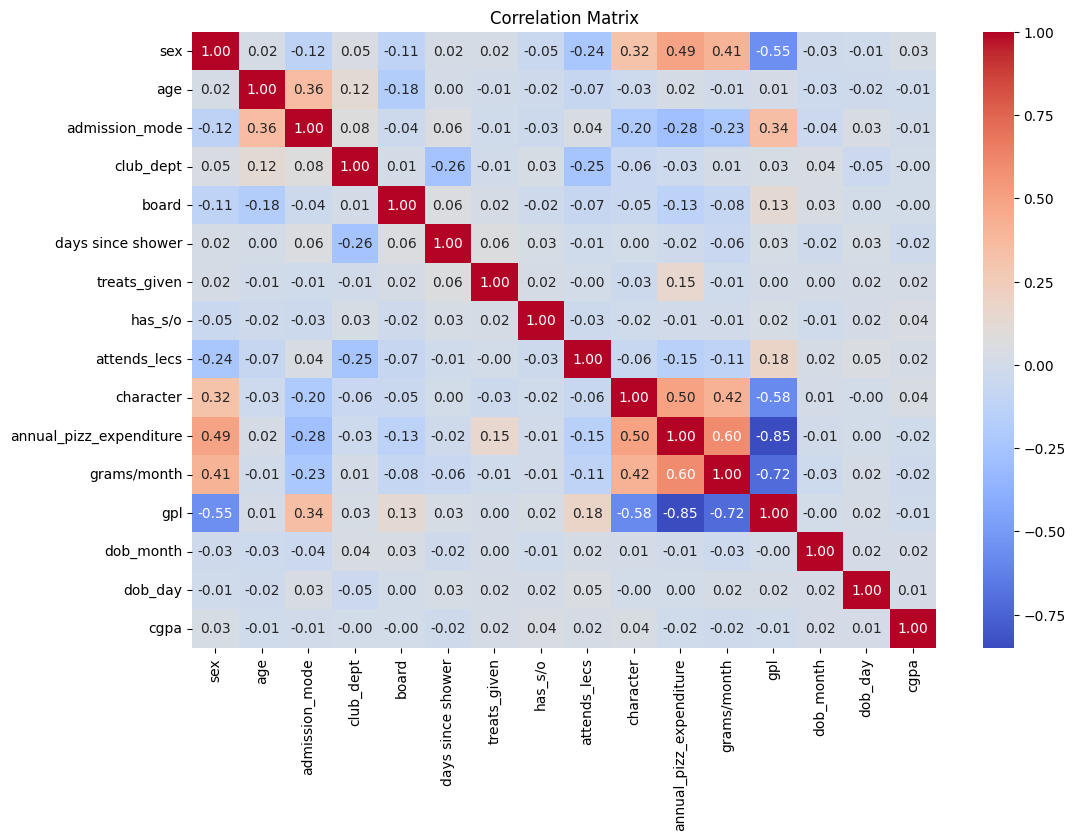

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# making a new field of aug_character by merging goes lecs and character
# this specifies the ghot charectiristic even better, the one who goes classes and has ghot character is ultimate ghot, and ghots get good gpl

conditions = [
    (df['attends_lecs'] == 0) & (df['character'] == 1),
    (df['attends_lecs'] == 1) & (df['character'] == 0),
    (df['attends_lecs'] == 0) & (df['character'] == 0),
    (df['attends_lecs'] == 1) & (df['character'] == 1)
]

choices = [0, 1, 2, 3]

df['aug_character'] = np.select(conditions, choices, default=np.nan)


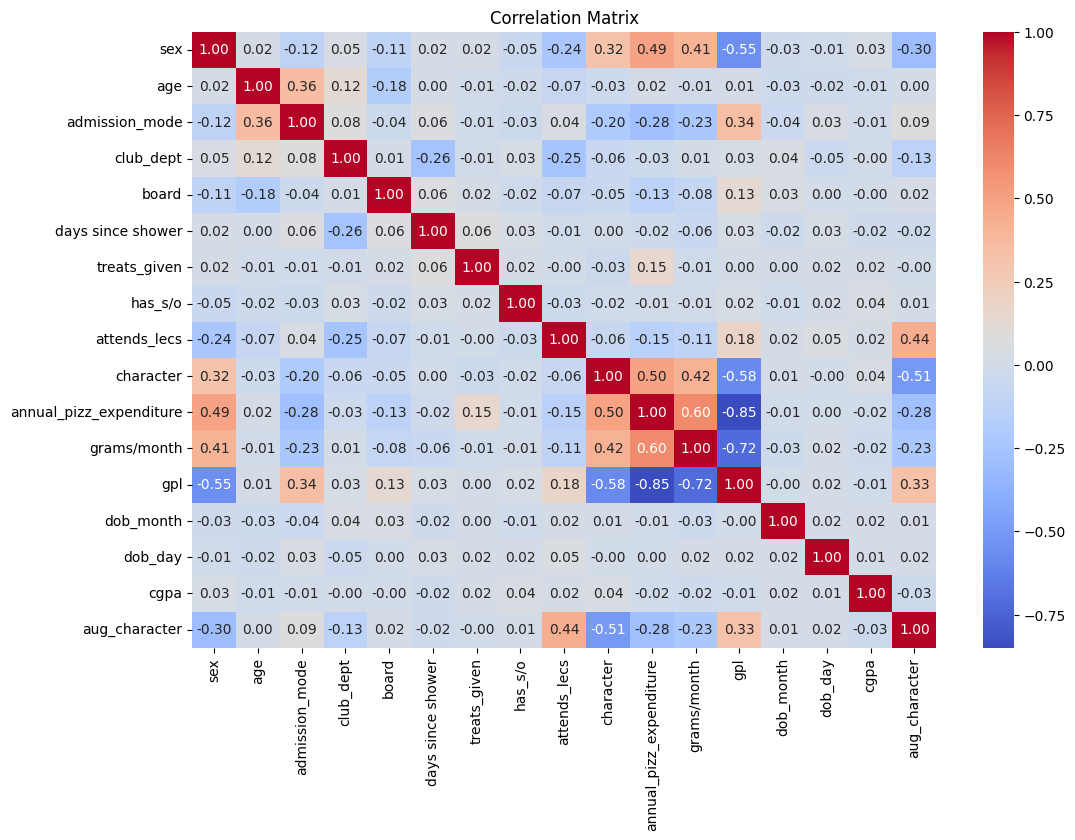

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['dob_day'] = df['dob_day'].replace(0, 7)

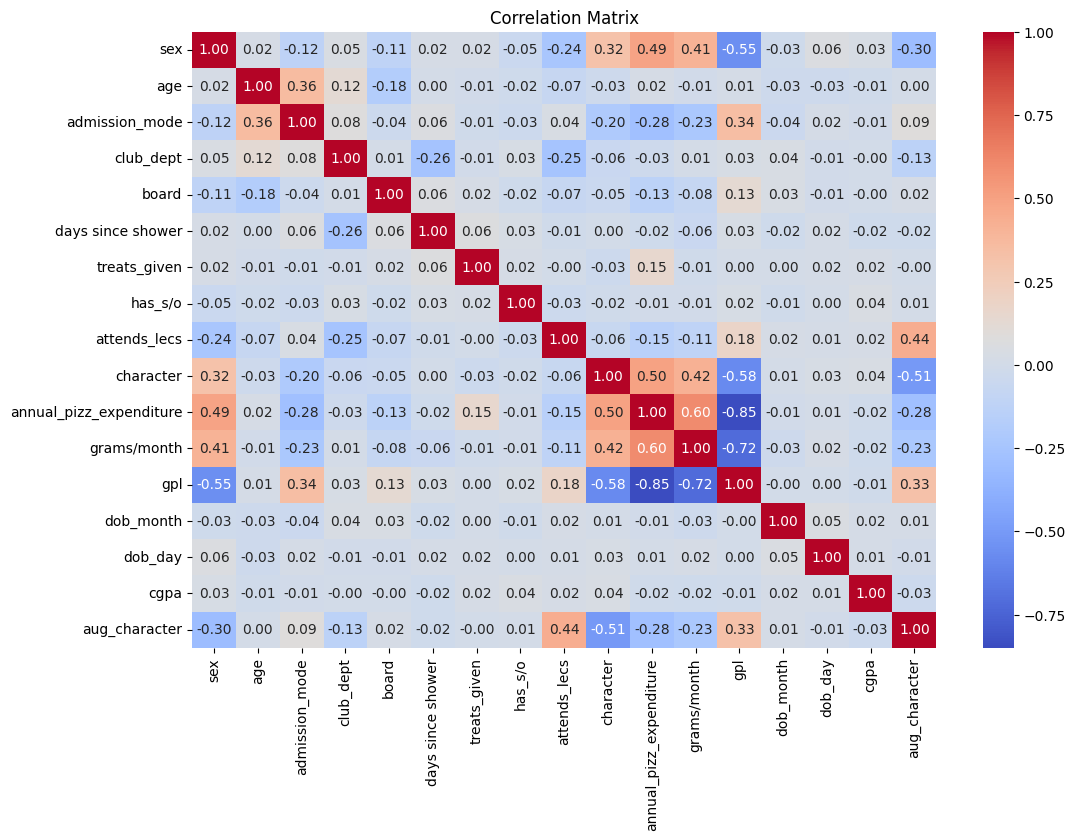

In [ ]:
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#well if someones bday lies on sunday then the probability of gpl should sure increase, but here what we know is the day when the person was born, to verify this hypothesis, i need to know which year this dataset was prepared coz the day on the bday will be different every year
#for now the dob day is useless
df.drop('dob_day', axis=1, inplace=True)

# **Model Creation and Training**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# Splitting the DataFrame into features (X) and target variable (y)
X = df.drop('gpl', axis=1)  # Features
y = df['gpl']               # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(879, 220, 879, 220)

## Model creation

In [ ]:
# Defining the model architecture
class BinaryClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 20)
        self.fc2 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
# Converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tensor)
input_size = X_train_scaled.shape[1]

In [ ]:
# Creating the model
model = BinaryClassificationModel(input_size)

In [ ]:
# Defining the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Model Training

Epoch [50/1500], Loss: 0.6001, Accuracy: 0.8373
Epoch [100/1500], Loss: 0.4281, Accuracy: 0.9408
Epoch [150/1500], Loss: 0.2773, Accuracy: 0.9568
Epoch [200/1500], Loss: 0.1884, Accuracy: 0.9716
Epoch [250/1500], Loss: 0.1385, Accuracy: 0.9795
Epoch [300/1500], Loss: 0.1088, Accuracy: 0.9795
Epoch [350/1500], Loss: 0.0900, Accuracy: 0.9863
Epoch [400/1500], Loss: 0.0769, Accuracy: 0.9875
Epoch [450/1500], Loss: 0.0674, Accuracy: 0.9898
Epoch [500/1500], Loss: 0.0599, Accuracy: 0.9898
Epoch [550/1500], Loss: 0.0539, Accuracy: 0.9898
Epoch [600/1500], Loss: 0.0488, Accuracy: 0.9920
Epoch [650/1500], Loss: 0.0443, Accuracy: 0.9920
Epoch [700/1500], Loss: 0.0403, Accuracy: 0.9932
Epoch [750/1500], Loss: 0.0367, Accuracy: 0.9943
Epoch [800/1500], Loss: 0.0333, Accuracy: 0.9954
Epoch [850/1500], Loss: 0.0304, Accuracy: 0.9954
Epoch [900/1500], Loss: 0.0276, Accuracy: 0.9954
Epoch [950/1500], Loss: 0.0252, Accuracy: 0.9954
Epoch [1000/1500], Loss: 0.0229, Accuracy: 0.9966
Epoch [1050/1500], L

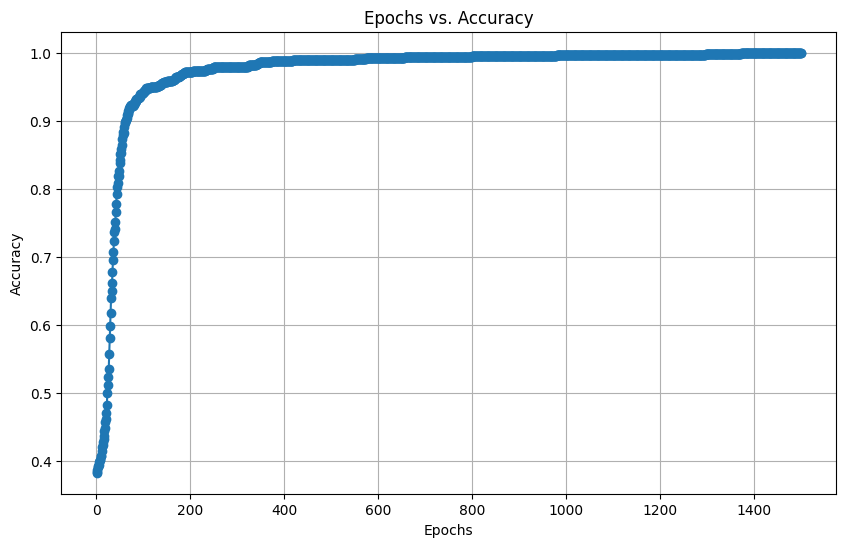

In [ ]:
# Training the model
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
epochs = []
accuracies = []

num_epochs = 1500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    with torch.no_grad():
        predicted = (outputs >= 0.5).float()
        accuracy = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)

    # Append epoch and accuracy to the lists
    epochs.append(epoch + 1)
    accuracies.append(accuracy)

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs. Accuracy')
plt.grid(True)
plt.show()

In [ ]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
X_test_scaled = scaler.transform(X_test_tensor)

In [ ]:
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculating predictions and converting to numpy arrays
predicted_np = predicted.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test_np, predicted_np)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test_np, predicted_np)
recall = recall_score(y_test_np, predicted_np)
f1 = f1_score(y_test_np, predicted_np)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Confusion Matrix:
[[141   0]
 [  0  79]]
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [ ]:
# Save the model state dict
torch.save(model.state_dict(), 'model_weights.pth')

# **Predicting for new dataset**

## Loading dataset for prediction

In [ ]:
pred_file_path = '/content/drive/My Drive/Test Data - Recruitments 2024 - Test Dataset - GPL.csv'
pred_df = pd.read_csv(pred_file_path)
pred_df.head()

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA-2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,BIRTHDAY,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH
0,male,23,DASA,8.60,8,NaN,CBSE,14,12/10/2001,3,YES,YES,LITE,16082,9.60
1,female,23,DASA,6.92,4,NaN,ICSE,1,10/4/2001,2,YES,YES,LITE,3308,0.35
2,male,17,BITSAT,4.46,7,NaN,CBSE,3,10/9/2007,3,YES,NO,GHOT,18004,1.00
3,female,20,BOARD TOPPER,6.16,4,NaN,ICSE,7,5/17/2004,4,YES,NO,GHOT,5870,0.50
4,male,19,BITSAT,7.12,4,NaN,CBSE,4,11/16/2005,3,FALSE,NO,GHOT,18351,9.30


## Preprocessing

In [ ]:
pred_df = pred_df.rename(columns={
    'SEX':'sex',
    'AGES': 'age',
    'ADMISSION MODE':'admission_mode',
    'CGPA - 1':'cgpa1',
    'CGPA-2':'cgpa2',
    ' CLUB / DEPARTMENT':'club_dept',
    'BOARD STUDIED':'board',
    'DAYS SINCE LAST SHOWER':'days since shower',
    'BIRTHDAY': 'dob',
    'TREATS GIVEN':'treats_given',
    ' HAS A S/O ?':'has_s/o',
    'ATTENDS LECTURES':'attends_lecs',
    'CHARACTER':'character',
    'PIZZERIA EXPENDITURE (annual)':'annual_pizz_expenditure',
    'GRAMS / MONTH':'grams/month',
    'GPL':'gpl'
})

In [ ]:
pred_df.head()

,sex,age,admission_mode,cgpa1,cgpa2,club_dept,board,days since shower,dob,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month
0,male,23,DASA,8.60,8,NaN,CBSE,14,12/10/2001,3,YES,YES,LITE,16082,9.60
1,female,23,DASA,6.92,4,NaN,ICSE,1,10/4/2001,2,YES,YES,LITE,3308,0.35
2,male,17,BITSAT,4.46,7,NaN,CBSE,3,10/9/2007,3,YES,NO,GHOT,18004,1.00
3,female,20,BOARD TOPPER,6.16,4,NaN,ICSE,7,5/17/2004,4,YES,NO,GHOT,5870,0.50
4,male,19,BITSAT,7.12,4,NaN,CBSE,4,11/16/2005,3,FALSE,NO,GHOT,18351,9.30


In [ ]:
pred_df['club_dept'] = pred_df['club_dept'].fillna('none')
pred_df['club_dept'].value_counts()

none              192
DVM                 5
Mountaineering      2
Gaming Club         1
Name: club_dept, dtype: int64

In [ ]:
pred_df_cat = pred_df.select_dtypes(object)
pred_df_cat = pred_df_cat.drop('dob',axis = 1)
pred_df_cat['has_s/o'] = pred_df_cat['has_s/o'].replace({'FALSE': 'NO'})
pred_df_cat.head()

,sex,admission_mode,club_dept,board,has_s/o,attends_lecs,character
0,male,DASA,none,CBSE,YES,YES,LITE
1,female,DASA,none,ICSE,YES,YES,LITE
2,male,BITSAT,none,CBSE,YES,NO,GHOT
3,female,BOARD TOPPER,none,ICSE,YES,NO,GHOT
4,male,BITSAT,none,CBSE,NO,NO,GHOT


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in pred_df_cat:
  pred_df[col] = le.fit_transform(pred_df_cat[col])

pred_df.head()

,sex,age,admission_mode,cgpa1,cgpa2,club_dept,board,days since shower,dob,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month
0,1,23,2,8.60,8,3,0,14,12/10/2001,3,1,1,1,16082,9.60
1,0,23,2,6.92,4,3,1,1,10/4/2001,2,1,1,1,3308,0.35
2,1,17,0,4.46,7,3,0,3,10/9/2007,3,1,0,0,18004,1.00
3,0,20,1,6.16,4,3,1,7,5/17/2004,4,1,0,0,5870,0.50
4,1,19,0,7.12,4,3,0,4,11/16/2005,3,0,0,0,18351,9.30


In [ ]:
pred_df['cgpa'] = (pred_df['cgpa1'] + pred_df['cgpa2']) / 2
pred_df = pred_df.drop(['cgpa1', 'cgpa2'], axis=1)

pred_df['dob'] = pd.to_datetime(pred_df['dob'])
pred_df['dob_month'] = pred_df['dob'].dt.month
pred_df = pred_df.drop('dob', axis=1)

pred_df.loc[df['annual_pizz_expenditure'] > 25000, 'annual_pizz_expenditure'] = 40000

conditions = [
    (pred_df['attends_lecs'] == 0) & (pred_df['character'] == 1),
    (pred_df['attends_lecs'] == 1) & (pred_df['character'] == 0),
    (pred_df['attends_lecs'] == 0) & (pred_df['character'] == 0),
    (pred_df['attends_lecs'] == 1) & (pred_df['character'] == 1)
]

choices = [0, 1, 2, 3]

pred_df['aug_character'] = np.select(conditions, choices, default=np.nan)
pred_df['club_dept'] = pred_df['club_dept'].replace({3: 4})

pred_df.head()

,sex,age,admission_mode,club_dept,board,days since shower,treats_given,has_s/o,attends_lecs,character,annual_pizz_expenditure,grams/month,cgpa,dob_month,aug_character
0,1,23,2,4,0,14,3,1,1,1,16082,9.60,8.30,12,3.0
1,0,23,2,4,1,1,2,1,1,1,3308,0.35,5.46,10,3.0
2,1,17,0,4,0,3,3,1,0,0,18004,1.00,5.73,10,2.0
3,0,20,1,4,1,7,4,1,0,0,5870,0.50,5.08,5,2.0
4,1,19,0,4,0,4,3,0,0,0,18351,9.30,5.56,11,2.0


In [ ]:
pred_df['club_dept'].value_counts()

4    192
0      5
2      2
1      1
Name: club_dept, dtype: int64

## Prediction

In [ ]:
X_pred_tensor = torch.tensor(scaler.transform(pred_df), dtype=torch.float32)

# Load the model architecture
model = BinaryClassificationModel(input_size)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(X_pred_tensor)
    predicted = (outputs >= 0.5).float()

# Convert predictions to a DataFrame if needed
predictions_df = pd.DataFrame({'Predicted_gpl': predicted.numpy().flatten()})

# Print or use predictions_df as needed
print(predictions_df)

     Predicted_gpl
0              0.0
1              1.0
2              0.0
3              1.0
4              0.0
..             ...
195            0.0
196            1.0
197            0.0
198            0.0
199            1.0

[200 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
predictions_df.replace({0: 'no', 1: 'yes'}, inplace=True)
predictions_df.to_excel('predictions.xlsx', index=True)